In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load and prepare MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the model architecture
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2971 - accuracy: 0.9137
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1474 - accuracy: 0.9558
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1120 - accuracy: 0.9661
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0904 - accuracy: 0.9718
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0793 - accuracy: 0.9760
Test accuracy: 0.9760000109672546


1/1 [==============================] - 3s 3s/step


AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'item'

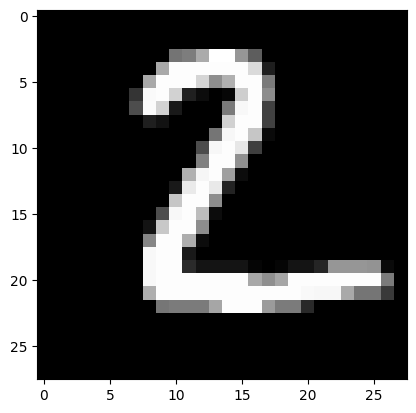

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load pre-trained model
model = tf.keras.applications.ResNet50(include_top=True, weights='imagenet')

# Load MNIST data
mnist_data = tf.keras.datasets.mnist
(_, _), (x_test, y_test) = mnist_data.load_data()
x_test = tf.image.grayscale_to_rgb(tf.expand_dims(x_test, axis=-1))

# Choose a random image from MNIST dataset
image = x_test[1]

# Resize the image to match the input shape of the ResNet50 model
image_resized = tf.image.resize(image, (224, 224))

# Make prediction
output = model.predict(image_resized[np.newaxis, ...])

# Get predicted label
predicted = tf.argmax(output, axis=-1)

# Display image and predicted label
plt.imshow(image.numpy().squeeze(), cmap='gray')
plt.title(f'Predicted Label: {predicted.item()}, Actual Label: {y_test[0]}')
plt.axis('off')
plt.show()


**Handwritten Digit Recognition on MNIST dataset**
1. First of all, import all the libraries required. We will import the fetch_openml from the sklearn.datasets library.

2. Create a variable mnist, and store in it the mnsit_784 dataset from the featch_openml And you can further print and see the contents of this mnist dataset. You can see its keys, its data, its corresponding labels, and more.

In [ ]:
# fetching dataset
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

mnist = fetch_openml('mnist_784')


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Slicing the dataset, and plotting the images**
3. Create array variables x and y. Store in them the data and the targets respectively of the mnist As we discussed above, we have 784 (28x28) pixels of features, and these are now stored in x. Variable y has the corresponding digit that the picture resembled by x contains.

4. You can try to see that picture x using matplotlib Since the pixels here are stacked together in a 1D array x for memory issues, you’ll have to reshape it back to 26x26. Create a variable some_digit and fill it with any random digit array from the dataset. Reshape it and store it in another variable some_digit_image.

5. You can now simply use the command below to get that image plotted. We have used the imshow attribute of pyplot and have fed the some_digit_image 2D array of pixel data into it.

In [ ]:
x, y = mnist['data'], mnist['target']

some_digit = x.to_numpy()[36001]
some_digit_image = some_digit.reshape(28, 28)  # let's reshape to plot it

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary,
           interpolation='nearest')
plt.axis("off")
plt.show()


6. And since the data, we stored corresponded to the 36000th element, the image we were shown was:

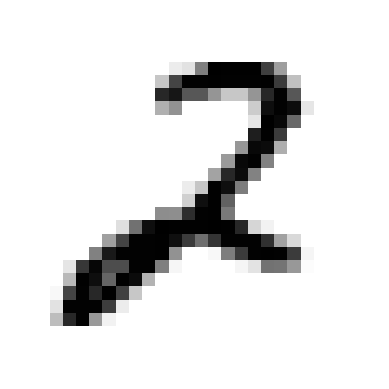

In [ ]:
x, y = mnist['data'], mnist['target']

some_digit = x.to_numpy()[36001]
some_digit_image = some_digit.reshape(28, 28)  # let's reshape to plot it

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary,
           interpolation='nearest')
plt.axis("off")
plt.show()
